In [63]:
from keras.datasets import mnist
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import OneHotEncoder

In [113]:
#load data
(X_train,y_train), (X_test,y_test) = mnist.load_data()

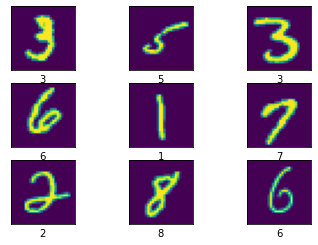

In [128]:
for i in range(10,19):
    plt.subplot(3,3,i-10+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])
plt.show()


In [48]:
ec=OneHotEncoder(sparse=False)
y_train=ec.fit_transform(y_train.reshape(-1,1))
y_test=ec.fit_transform(y_test.reshape(-1,1))
print("label after one-hot encode : "+str(y_train[0]))

label after one-hot encode : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [49]:
print("features shape : "+str(X_train.shape))
print("labels shape   : "+str(y_train.shape))

features shape : (60000, 28, 28)
labels shape   : (60000, 10)


In [50]:
img_size=28

In [51]:
X_train,X_test=X_train/255.0,X_test/255.0

In [130]:
#standardized data size
X_train=X_train.reshape(X_train.shape[0],img_size,img_size,1)
X_test=X_test.reshape(X_test.shape[0],img_size,img_size,1)

In [69]:
#define model
def Model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=X_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [131]:
model=Model()
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_11 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_12 (Batc (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)        

In [90]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2385 - accuracy: 0.9273 - val_loss: 0.0668 - val_accuracy: 0.9782
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0946 - accuracy: 0.9701 - val_loss: 0.0509 - val_accuracy: 0.9813
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0718 - accuracy: 0.9776 - val_loss: 0.0418 - val_accuracy: 0.9857
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0607 - accuracy: 0.9808 - val_loss: 0.0383 - val_accuracy: 0.9871
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0541 - accuracy: 0.9829 - val_loss: 0.0347 - val_accuracy: 0.9886


In [83]:
model.save('C:/Users/LENOVO/Desktop/PYTHON Program/CNN/handwritten_digit/saved_model')

INFO:tensorflow:Assets written to: C:/Users/LENOVO/Desktop/PYTHON Program/CNN/handwritten_digit/saved_model\assets


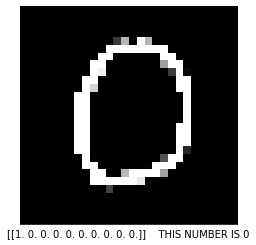

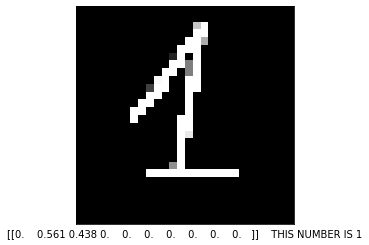

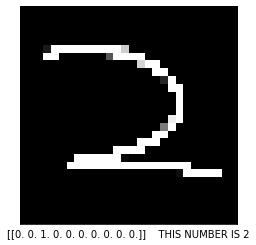

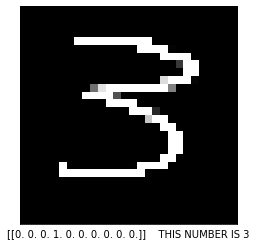

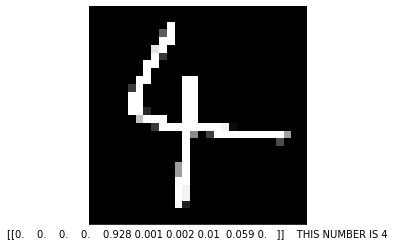

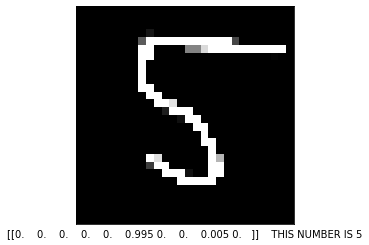

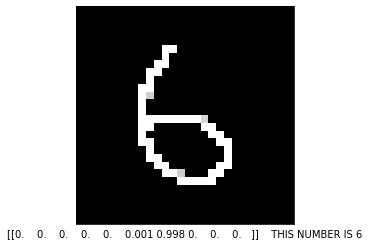

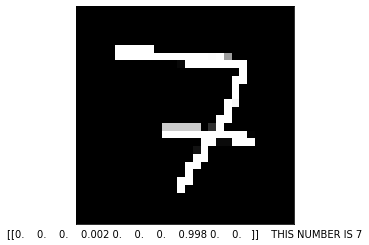

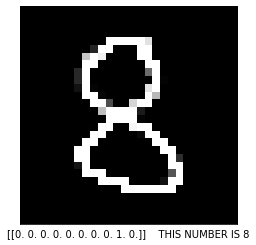

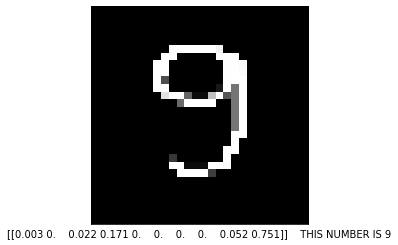

In [121]:
#Predict
test_path='C:/Users/LENOVO/Desktop/PYTHON Program/CNN/handwritten_digit/test/test3'
for i in range(10):
    
    plt.xticks([])
    plt.yticks([]) 
    
    img=cv2.imread(test_path + '/' + str(i) +'.png',cv2.IMREAD_GRAYSCALE)
    img=cv2.resize(img,(img_size,img_size))
    img=cv2.bitwise_not(img) #CONVERSE IMAGE COLOR (WHITE-BLACK)
    plt.imshow(img,cmap='gray')
    
    img=img.reshape(-1,img_size,img_size,1)
    pred=np.round(model.predict(img/255.0),3) #predict number images
    
    #display output
    num_pred=-1
    for i in range (10):
        if pred[:,i]>=0.5:
            num_pred=i
            break
    if num_pred!=-1:
        plt.xlabel(str(pred)+"    THIS NUMBER IS "+str(num_pred))
    else:
        plt.xlabel(str(pred)+"    UNKNOW")
    plt.show()